<center>

# Aviation Safety Data Analysis #
    
</center>

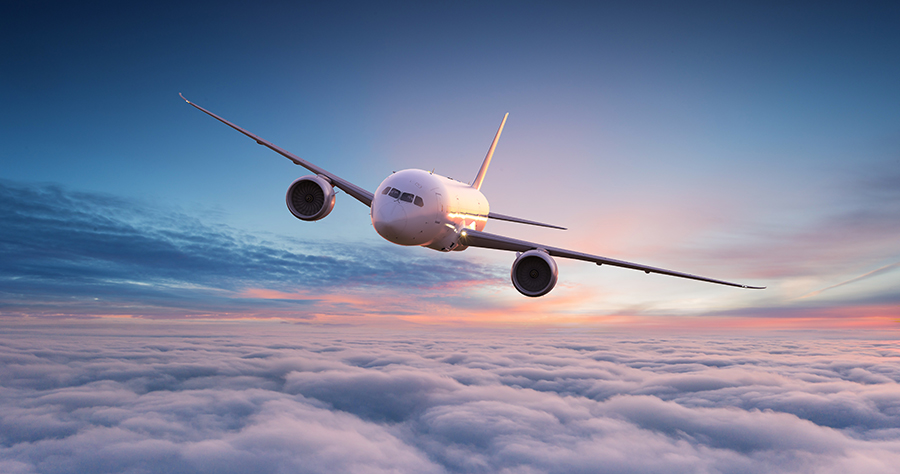

## Overview ##

This project uses data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. With that we can make a national analysis of the most common makes of personal aircraft within the 21st century, then discover which can be the safest for the consumer.

## Business Problem ##

When getting into a new industry, it is vital to assess the risks. What is a greater risk than to lose a life?
With business that involves the potential for injuries or worse fatalities, there is the question, what is the right product to invest in?

A lot of these aircrafts have reputations themselves and can be considered "popular". So, which of these "popular" aircrafts can the business take on as a product while also ensuring that the consumers safety is the number one priority?

## Bottom Line: ##

- Through this data, find the aircraft that is most popular, yet safe.


In [421]:
import pandas as pd
df = pd.read_csv('data/AviationData.csv', encoding = 'ISO-8859-1',low_memory=False)

## Data Understanding ##

Within the data we have information dated as far back as 1962 to 2023, from national and international aviation incidents and accidents. Providing location, airport information, aircraft descriptions including wether it is private or commercial. Most importantly it catergorizes type of injury or fatality. 

In [422]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Analysis ##

Before cleaning the data, start by creating a copy in case of error to keep the original secure.

In [424]:
df_copy = df

We'll start to filter the data by the first main components of our analysis.
- Date: Being within the last 23 years. Convert into interger.
- Country: Our business is remaining national. 
- Location: We want to find the best state to have our base airport.
- Type of aircraft: We are working with airplanes.
- Type of flight: Sticking with private flights.
- Investigation type: We are looking for accidents that have happened with airplanes.


In [425]:
df_copy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [426]:
df_copy["Event.Date"] = pd.to_datetime(df_copy["Event.Date"]).dt.year
df_copy["Event.Date"] = df_copy["Event.Date"].astype(int)

df_copy = df_copy[df_copy["Event.Date"] >= 2012]
df_copy = df_copy[df_copy["Country"] == "United States"]
df_copy = df_copy[df_copy["Aircraft.Category"] == "Airplane"]
df_copy = df_copy[df_copy["Purpose.of.flight"] == "Personal"]
df_copy = df_copy[df_copy["Investigation.Type"] == "Accident"]

df_copy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
71225,20120102X93914,Accident,ERA12LA131,2012,"Willimantic, CT",United States,414430N,0721123W,IJD,Windham Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020
71227,20111230X02532,Accident,WPR12CA073,2012,"Eureka, CA",United States,404812N,0124646W,EKA,Murray Field Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A collision with a deer while landing.,25-09-2020
71228,20120103X35104,Accident,ERA12CA134,2012,"River Ranch, FL",United States,027543N,0813448W,2RR,River Ranch,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020
71229,20120103X94513,Accident,ERA12LA132,2012,"Shelter Island, NY",United States,004140N,0722035W,NaN,Klenawicus Airfield,...,Personal,NORTHEASTERN AVIATION CORP,0.0,0.0,0.0,1.0,VMC,NaN,"A hard landing, which resulted in a failure of...",25-09-2020
71231,20120104X41711,Accident,CEN12CA121,2012,"Truth or Consequences, NM",United States,331413N,1071618W,TCS,Truth or Consequences Municipa,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot did not maintain airplane control du...,25-09-2020


In [427]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 71225 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                8264 non-null   object 
 1   Investigation.Type      8264 non-null   object 
 2   Accident.Number         8264 non-null   object 
 3   Event.Date              8264 non-null   int64  
 4   Location                8264 non-null   object 
 5   Country                 8264 non-null   object 
 6   Latitude                8260 non-null   object 
 7   Longitude               8260 non-null   object 
 8   Airport.Code            6129 non-null   object 
 9   Airport.Name            6068 non-null   object 
 10  Injury.Severity         8260 non-null   object 
 11  Aircraft.damage         8250 non-null   object 
 12  Aircraft.Category       8264 non-null   object 
 13  Registration.Number     8264 non-null   object 
 14  Make                    8263 non-nu

## Location ##

- We want to stick nationally but let's refine that to state.

In [428]:
df_copy["State"] = df["Location"].str.split(",").str[-1].str.strip()
df_copy["State"].value_counts().head(20)

CA    784
TX    649
FL    580
AK    579
AZ    295
CO    268
WA    254
ID    233
GA    231
NC    217
OR    209
PA    203
OH    190
NY    186
WI    180
MI    176
MO    157
UT    155
TN    150
MN    144
Name: State, dtype: int64

## Injuries ##

Knowing we want to see the risks of these aircrafts we will start to filter by injuries and fatalities.

- There is another column ("Injury.Serverity") with the same information. We'll check to see if different or duplicate.
- See how much data is missing from each column.
- Decide how to handle missing data.

In [429]:
df_check = df_copy[["Injury.Severity", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries","Total.Uninjured"]]
df_check.head(10)

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
71225,Non-Fatal,0.0,0.0,0.0,1.0
71227,Non-Fatal,0.0,0.0,0.0,1.0
71228,Non-Fatal,0.0,0.0,0.0,3.0
71229,Non-Fatal,0.0,0.0,0.0,1.0
71231,Non-Fatal,0.0,0.0,0.0,1.0
71234,Non-Fatal,0.0,0.0,0.0,1.0
71235,Non-Fatal,0.0,0.0,0.0,1.0
71236,Non-Fatal,0.0,0.0,0.0,1.0
71239,Non-Fatal,0.0,0.0,0.0,1.0
71240,Non-Fatal,0.0,2.0,0.0,0.0


- Okay great, it appears this is a duplicate of information.
So we can drop this column.

In [430]:
df_copy.drop("Injury.Severity", axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 71225 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                8264 non-null   object 
 1   Investigation.Type      8264 non-null   object 
 2   Accident.Number         8264 non-null   object 
 3   Event.Date              8264 non-null   int64  
 4   Location                8264 non-null   object 
 5   Country                 8264 non-null   object 
 6   Latitude                8260 non-null   object 
 7   Longitude               8260 non-null   object 
 8   Airport.Code            6129 non-null   object 
 9   Airport.Name            6068 non-null   object 
 10  Aircraft.damage         8250 non-null   object 
 11  Aircraft.Category       8264 non-null   object 
 12  Registration.Number     8264 non-null   object 
 13  Make                    8263 non-null   object 
 14  Model                   8263 non-nu

- While we are in the midst of dropping unnecessary columns, let's drop everything else not of relevance.


In [431]:
columns = df_copy.columns[[0, 2, 4, 6, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 21, 26, 27, 28, 29]]
drop_columns = columns.tolist()
df_copy = df_copy.drop(drop_columns, axis=1)

- I also want to change the names for some of the columns to make them more clear based off our analysis.

In [432]:
df_copy = df_copy.rename(columns = {"Total.Fatal.Injuries": "Fatal.Injuries", "Total.Serious.Injuries": "Serious.Injuries", "Total.Minor.Injuries": "Minor.Injuries", "Total.Uninjured": "Uninjured", "Investigation.Type": "Accidents", "Event.Date": "Date"})

In [433]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 71225 to 88886
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accidents          8264 non-null   object 
 1   Date               8264 non-null   int64  
 2   Country            8264 non-null   object 
 3   Aircraft.Category  8264 non-null   object 
 4   Make               8263 non-null   object 
 5   Model              8263 non-null   object 
 6   Purpose.of.flight  8264 non-null   object 
 7   Fatal.Injuries     8264 non-null   float64
 8   Serious.Injuries   8264 non-null   float64
 9   Minor.Injuries     8264 non-null   float64
 10  Uninjured          8264 non-null   float64
 11  State              8264 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 839.3+ KB


- How many missing values are in our injury columns?

    Checking the percentage of how many missing values for each column can help determine what to do.

In [434]:
null_percentages = (df_copy[["Fatal.Injuries", "Serious.Injuries", "Minor.Injuries", "Uninjured"]].isnull().sum() / len(df_copy)) * 100 
null_percentages = null_percentages.round(2).astype(str) + "%"
null_percentages

Fatal.Injuries      0.0%
Serious.Injuries    0.0%
Minor.Injuries      0.0%
Uninjured           0.0%
dtype: object

- These numbers are low enough, that it won't impact our outcome if we drop them.

In [435]:
df_copy = df_copy.dropna(subset=["Fatal.Injuries", "Serious.Injuries", "Minor.Injuries", "Uninjured", "Make", "Accidents"])

- After cleaning up all the columns, we'll reset the index.

In [436]:
df_copy = df_copy.reset_index(drop=True)
df_copy.head()

,Accidents,Date,Country,Aircraft.Category,Make,Model,Purpose.of.flight,Fatal.Injuries,Serious.Injuries,Minor.Injuries,Uninjured,State
0,Accident,2012,United States,Airplane,HANEY JOHN F B,SEASTAR XP,Personal,0.0,0.0,0.0,1.0,CT
1,Accident,2012,United States,Airplane,MCADAM W E,CHRISTEN EAGLE II,Personal,0.0,0.0,0.0,1.0,CA
2,Accident,2012,United States,Airplane,MAULE,M-5-180C,Personal,0.0,0.0,0.0,3.0,FL
3,Accident,2012,United States,Airplane,PIPER,PA-34-200T,Personal,0.0,0.0,0.0,1.0,NY
4,Accident,2012,United States,Airplane,BUTLER JOHN R,SX 300,Personal,0.0,0.0,0.0,1.0,NM


## Make ##

- Taking a peek into the "Make" column,  we can see there is a good amount of duplicate information.

In [437]:
df_copy["Make"].value_counts().head(10)

CESSNA                1810
PIPER                 1195
Cessna                 456
BEECH                  422
Piper                  314
MOONEY                 141
Beech                  125
CIRRUS DESIGN CORP     107
BELLANCA                95
MAULE                   83
Name: Make, dtype: int64

- We'll clean this up by consolidating.

In [438]:
df_copy["Make"].replace(to_replace = ["CESSNA", "Cessna", "CESSNA AIRCRAFT CO", "CESSNA Aircraft", "CESSNA AIRCRAFT", "Cessna Aircraft Co.", "Cessna Aircraft Company"], value = "Cessna", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["PIPER", "Piper", "PIPER AIRCRAFT INC", "New Piper", "NEW PIPER", "NEW PIPER AIRCRAFT INC", "New Piper Aircraft, Inc."], value = "Piper", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["BEECH", "Beech", "BEECH AIRCRAFT", "BEECH AIRCRAFT CO.", "Beech Aircraft Corp", "Beech Aircraft Corporation", "BEECH AIRCRAFT CORPORATION"], value = "Beechcraft", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["MOONEY", "Mooney", "MOONEY AIRCRAFT CORP."], value = "Mooney", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["CIRRUS DESIGN CORP", "Cirrus", "Cirrus Design Corp.", "CIRRUS"], value = "Cirrus", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["MAULE", "Maule"], value = "Malue", inplace = True, regex = False)

## Model ##

- Reviewing our makes and models with the most accidents associated to injuries.

In [439]:
df_copy[["Make", "Model"]].value_counts().head(60)

Make        Model    
Cessna      172          275
            182          140
Piper       PA28         127
Cirrus      SR22         122
Cessna      180          120
Beechcraft  A36           80
Cessna      150           77
            140           63
Piper       PA18          62
Cessna      152           58
            172M          58
            170           52
Mooney      M20J          51
Piper       PA-18-150     51
Cessna      170B          50
            172N          48
            A185          47
Piper       PA32          44
            PA-28-140     44
Cessna      210           43
            172S          41
            A185F         40
Piper       PA 18-150     40
Beechcraft  35            38
Piper       PA22          36
Cessna      177           36
Piper       PA46          35
Mooney      M20C          34
Piper       PA28R         33
AERONCA     7AC           32
Cessna      120           32
Piper       PA 12         29
            PA-28-180     29
Cessna      T210     

## Data Analysis ##

Now that our data is cleaned up we can start our anaylsis.

- First, looking at the amount of accidents within the data timeframe.
- Then, looking into how severe the injuries are in those accidents.
- Finally, looking at what make of airplane is the most responsible choice.

In [440]:
import matplotlib.pyplot as plt
from datetime import datetime

### Accidents from the past 23 years ###

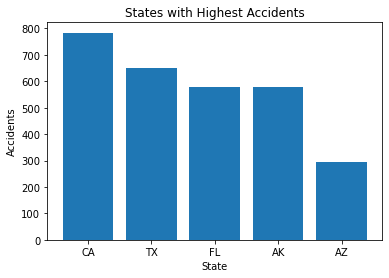

In [441]:
state_accidents = df_copy.groupby("State")["Accidents"].count()

sorted_states = state_accidents.sort_values(ascending = False)

top_5 = sorted_states.head(5)


plt.bar(top_5.index, top_5.values)

plt.xlabel("State")
plt.ylabel("Accidents")
plt.title("States with Highest Accidents")

plt.show()

### Severity of injuries from accidents ###

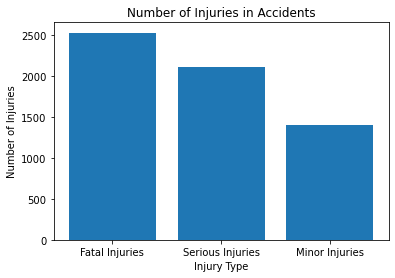

In [442]:
injuries = df_copy[["Fatal.Injuries", "Serious.Injuries", "Minor.Injuries"]].sum()

labels = ["Fatal Injuries", "Serious Injuries", "Minor Injuries"]
values = injuries.values

plt.bar(labels, values) 
plt.xlabel("Injury Type")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries in Accidents")
plt.show()

- Fortunately, the highest value is uninjured passengers but we want to focus on those that have been injured.

### Aircraft makes with most injuries ###

- With this data we are excluding uninjured passengers.

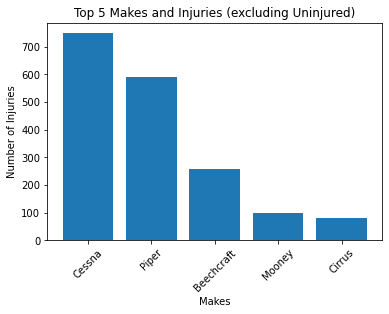

In [443]:
filtered_df = df_copy[df_copy['Uninjured'] == 0] 
top_makes = filtered_df['Make'].value_counts().head(5)

plt.bar(top_makes.index, top_makes.values)
plt.xlabel('Makes')
plt.ylabel('Number of Injuries')
plt.title('Top 5 Makes and Injuries (excluding Uninjured)')
plt.xticks(rotation=45)
plt.show()

## Evaluation ##

- Our data shows there were little to no accidents from 2000 - 2007
- From that we can see the accidents that did happen, a large majority of passengers were uninjured.
- Final analysis shows, injuries ranging from fatal - minor, mostly involve a Cessna aircraft.
- Closely behind Cessna, in injuries, is the Piper aircraft.

## Recommendation - Saftey, Popularity  and Cost ##

Outside research shows the most cost effective aircrafts to invest in are:

- 1. Cessna
- 2. Piper
- 3. Mooney
- 4. Beechcraft
- 5. Cirrus


But from our analysis we see that both Cessna and Piper have the greatest safety risk.
Wanting to enter the aviation field for a new business, while remaining national and private, we recommend the type of aircraft make to invest in would be:

<center>
    
 # <u> Mooney M20 # 
    
    
<center/>

![ALT TEXT](https://flyer.co.uk/wp-content/uploads/2016/02/Mooney-2016-Acclaim-Ultra-2.jpg)

In [403]:
df_copy.to_csv("data_filtered.csv")